# Partial Differential Equations (PDEs) for Spatial Population Modeling

[1-2 sentences describing what PDEs do]

PDEs in Spatial Modeling
- PDEs can be used to represente how population density evolves over time AND space.


## The Diffusion equation

For simplicity, we will start with the diffusion equation, modeling the spread of a bacterial population in space. Diffusion moves species from high-density to low-density.

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

- $u(x,t)$: Population concentration at position $x$ and time $t$.
- $D$: Diffusion coefficient


## 1D diffusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Simulation parameters
total_time = 10
n_time_points = 50

# Spatial domain
L = 10    # length of the domain
Nx = 100  # number of spatial points
x = np.linspace(0, L, Nx)  # create spatial grid
dx = x[1] - x[0]  # distance between adjacent points

# Diffusion coefficient
D = 0.1  # distance/time

# initial population
u_initial = np.zeros_like(x)
u_initial[20] = 1.0
u_initial[50] = 1
u_initial[51] = 1.2

# 1D diffusion function
def diffusion_1d(t, u):
    dudx2 = np.zeros(Nx)
    dudx2[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / dx**2
    # zero fluxes at the boundaries
    dudx2[0] = dudx2[1]
    dudx2[-1] = dudx2[-2]
    return D * dudx2

# Time integration
t_vec = np.linspace(0, total_time, n_time_points)
soln = solve_ivp(diffusion_1d, (0, total_time), u_initial, t_eval=t_vec)


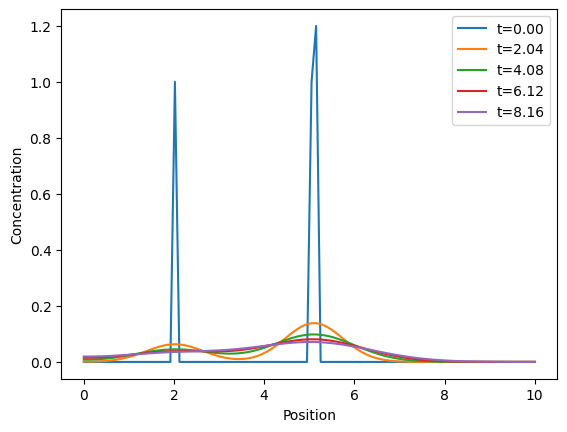

In [2]:
# plot
plt.figure()
for i in range(0, len(t_vec), 10):
    plt.plot(x, soln.y[:,i], label=f't={t_vec[i]:.2f}')
plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()

## 2D Diffusion

The 2D diffusion equation represents concentrations on a plane x:

$$
\frac{\partial u}{\partial t} = D \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)
$$

where $u(x,y,t)$ represent the concentrations of the species at position $(x, y)$ and time $t$, and diffusion coefficient $D$.

In [3]:
from scipy.ndimage import convolve

# Laplacian diffusion
LAPLACIAN_2D = np.array([[0,  1, 0],
                         [1, -4, 1],
                         [0,  1, 0]])

def diffusion_2d(initial_state, D, total_time, dt):
    state = initial_state.copy()
    n_steps = int(total_time/dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # apply the convolution
        laplacian = convolve(state, LAPLACIAN_2D)
        state += D * laplacian * dt
        solution.append(state.copy())
    return solution


In [4]:
# simulation parameters
total_time = 1000
dt = 0.1

# initial state
Lx = 100
Ly = 100
# initial_state = np.random.rand(Lx, Ly)
initial_state = np.zeros((Lx, Ly))
initial_state[40:50, 40:50] = 1
initial_state[50:60, 50:60] = 1


D = 1.0  # diffusion coefficient

solution = diffusion_2d(initial_state, D, total_time, dt)

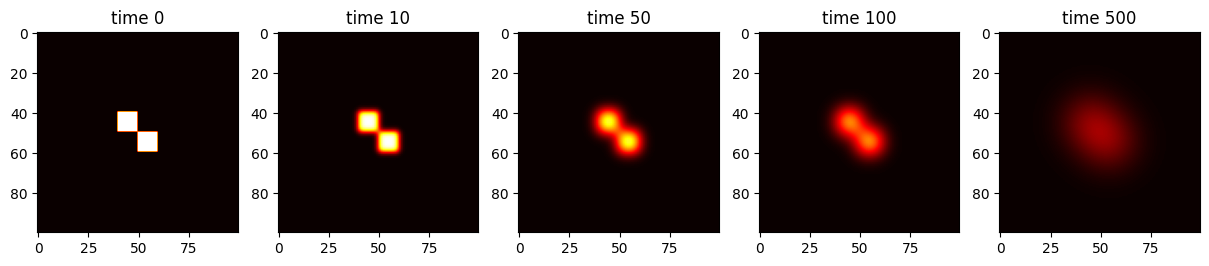

In [5]:
# plot
snapshot_steps = [0, 10, 50, 100, 500]

global_min = np.min([solution[step].min() for step in snapshot_steps])
global_max = np.max([solution[step].max() for step in snapshot_steps])

fig, axes = plt.subplots(1, len(snapshot_steps), figsize=(15, 5))
for i, step in enumerate(snapshot_steps):
    im = axes[i].imshow(solution[step], 
                   vmin=global_min, vmax=global_max,
                   cmap='hot'
                  )
    axes[i].set_title(f'time {step}')
    # fig.colorbar(im, ax=axes[i])
plt.show()

## Boundary conditions

Boundary conditions define how variables behave at the boundaries of a simulation domain.

In PDEs, some common boundary conditions:
- **Dirichlet**: fixed value at boundary
- **Neumann**: fixed flux at boundary
- **Periodic**: wrapped around

In [35]:
def diffusion_2d_modes(initial_state, D, total_time, dt, mode='constant', cval=0):
    state = initial_state.copy()
    n_steps = int(total_time/dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # apply the convolution
        laplacian = convolve(state, LAPLACIAN_2D, mode=mode, cval=cval)
        state += D * laplacian * dt
        solution.append(state.copy())
    return solution

def diffusion_2d_gradient_boundary(initial_state, D, total_time, dt, mode='constant', cval=0):
    """
    specific use case with gradient, not meant for general use
    """
    
    state = initial_state.copy()
    n_steps = int(total_time/dt)
    solution = [initial_state]
    
    for t in range(n_steps):
        # apply the convolution
        laplacian = convolve(state, LAPLACIAN_2D, mode=mode, cval=cval)
        state += D * laplacian * dt

        # set boundaries
        state[0, :] = 0  # top is 0
        state[-1, :] = 1 # bottom is 1
        
        solution.append(state.copy())  
    return solution

def plot_solution(solution, times):
    global_min = np.min([solution[step].min() for step in times])
    global_max = np.max([solution[step].max() for step in times])
    
    fig, axes = plt.subplots(1, len(times), figsize=(12, 4))
    for i, step in enumerate(times):
        im = axes[i].imshow(
            solution[step], 
            vmin=global_min,
            vmax=global_max,
            cmap='viridis'
            )
        axes[i].set_title(f'time {step}')
    plt.show()
    

In [27]:
length = 20
initial_state = np.random.rand(length, length)
initial_state[0:int(length/2),0:int(length/2)] = 1

# Diffusion coefficient
D = 1.0

# simulation params
dt = 0.1

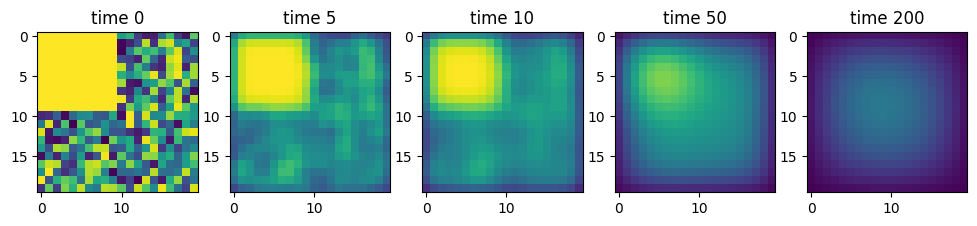

In [30]:
total_time = 200
solution_dirichlet = diffusion_2d_modes(initial_state, D, total_time, dt, mode='constant', cval=0)

#plot
plot_solution(solution_dirichlet, [0, 5, 10, 50, total_time])

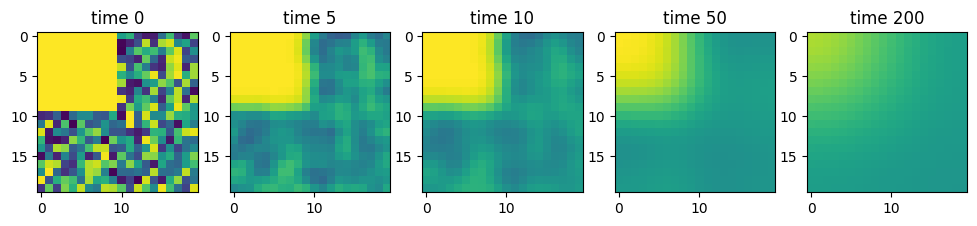

In [29]:
total_time = 200
solution_neumann = diffusion_2d_modes(initial_state, D, total_time, dt, mode='nearest')
plot_solution(solution_neumann, [0, 5, 10, 50, total_time])

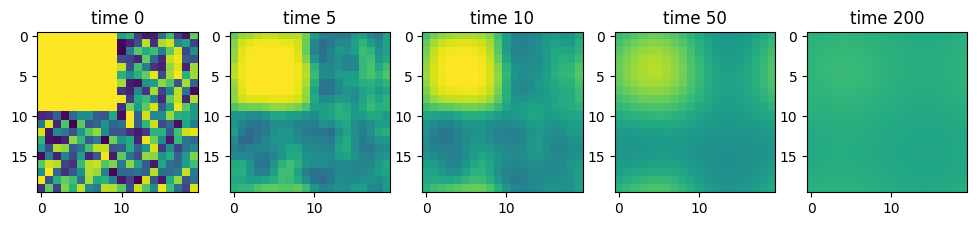

In [36]:
solution_periodic = diffusion_2d_modes(initial_state, D, total_time, dt, mode='wrap')
plot_solution(solution_periodic, [0, 5, 10, 50, total_time])

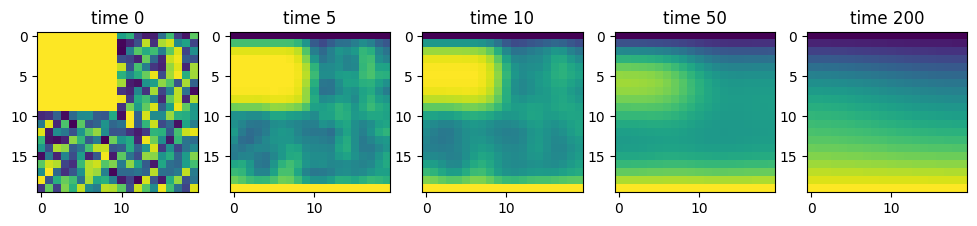

In [33]:
solution_gradient = diffusion_2d_gradient_boundary(initial_state, D, total_time, dt, mode='nearest')
plot_solution(solution_gradient, [0, 5, 10, 50, total_time])

## Non-uniform diffusion